<a href="https://colab.research.google.com/github/RNandini-11/CODSOFT/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODSOFT INTERNSHIP**

**TASK-4: Sales Prediction using Python**

Author: Rajnandini

Domain: Data Science

Batch: November-24


In [ ]:
# Import libraries for data processing and modeling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
# Linking dataset into colab
import io
imdb_df = pd.read_csv((io.BytesIO(uploaded['advertising.csv'])),encoding='unicode_escape')

In [ ]:
# Dataset First Look
imdb_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
imdb_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
imdb_df.shape

(200, 4)

In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
imdb_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
imdb_df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


 **Basic Observation**

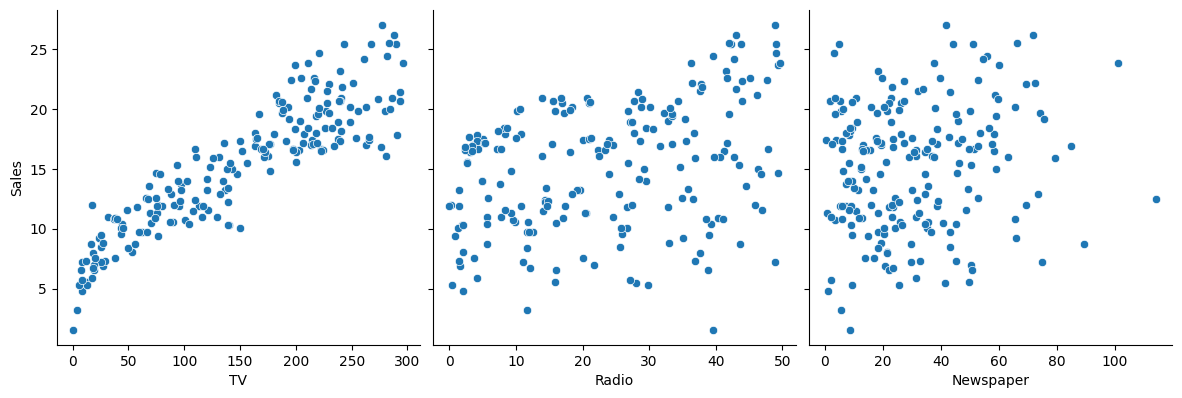

In [ ]:
sns.pairplot(imdb_df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4, kind='scatter')
plt.show()

**Pairplot Observation**

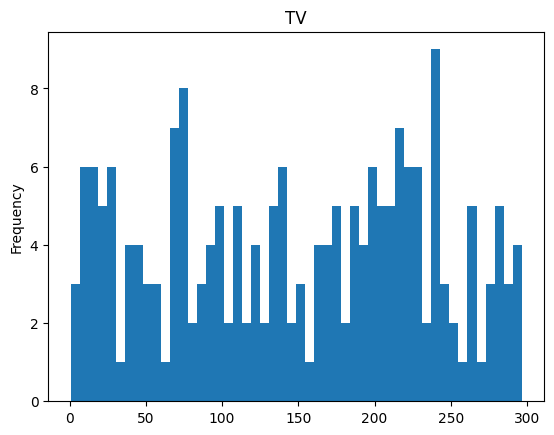

In [ ]:
imdb_df['TV'].plot.hist(bins=50,title='TV')
plt.show()

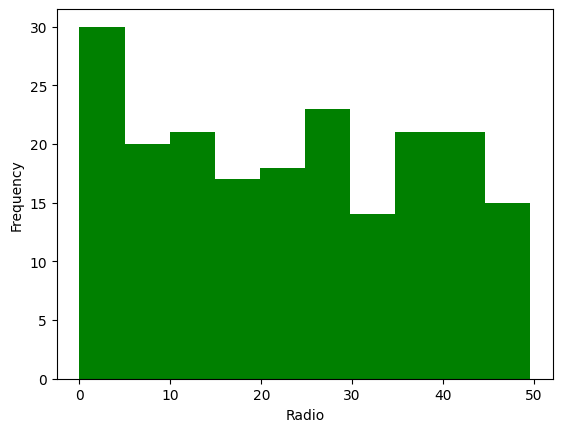

In [ ]:
imdb_df['Radio'].plot.hist(bins=10,xlabel='Radio',color='green')
plt.show()

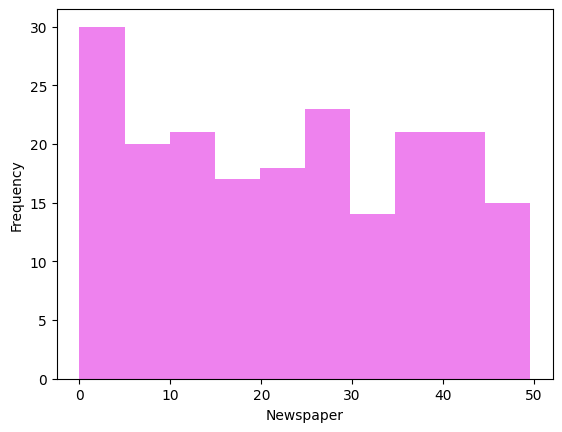

In [ ]:
imdb_df['Radio'].plot.hist(bins=10,xlabel='Newspaper',color='Violet')
plt.show()

**Histogram Observation**

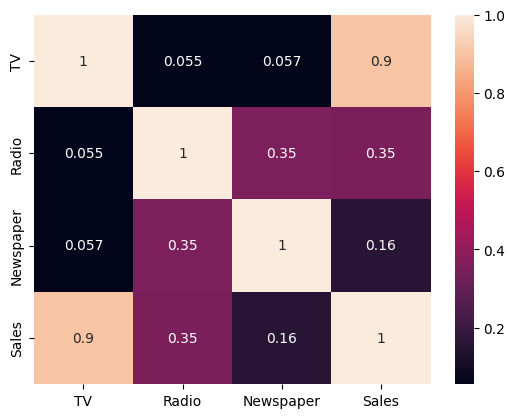

In [ ]:
sns.heatmap(imdb_df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( imdb_df[['TV']], imdb_df[['Sales']], test_size=0.3, random_state=0)

In [ ]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [ ]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
res = regressor.predict(X_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [ ]:
regressor.coef_

array([[0.05473199]])

In [ ]:
regressor.intercept_

array([7.14382225])

In [ ]:
0.05473199*69.7+7.1432225

10.958042203000002

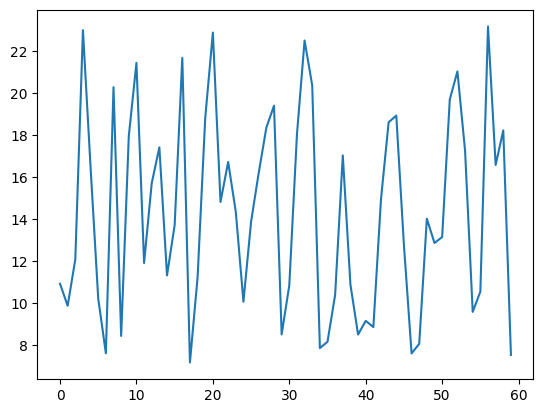

In [ ]:
plt.plot(res)

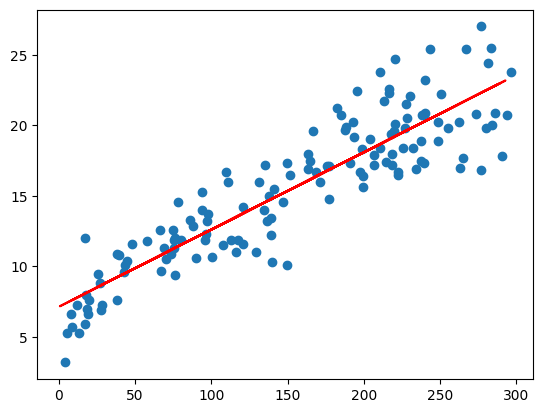

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,7.1432225 + 0.05473199 * X_test,'r')
plt.show()